In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/amsterdam-house-price-prediction/HousingPrices-Amsterdam-August-2021.csv')
print(df.head(5))

   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [5]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [6]:
#dropping duplicates
df.drop_duplicates()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [11]:
df.dropna()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,97,694,685000.0,64,3,4.907736,52.356157
1,2,450,421,475000.0,60,3,4.850476,52.348586
2,3,905,752,850000.0,109,4,4.944774,52.343782
3,4,754,436,580000.0,128,6,4.789928,52.343712
4,5,898,257,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,675,748,750000.0,117,1,4.927757,52.354173
920,921,435,221,350000.0,72,3,4.890612,52.414587
921,922,747,396,350000.0,51,3,4.856935,52.363256
922,923,391,739,599000.0,113,4,4.965731,52.375268


In [12]:
#replacing nan values 
df=df.replace(np.nan,0)

In [13]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']                 # Categorical columns
print('Categorical columns :',cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object']                 # Numerical columns
print('Numerical columns :',num_col)
df[cat_col].nunique()

Categorical columns : []
Numerical columns : ['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat']


Series([], dtype: float64)

In [10]:
#label encoding the categorial columns
le = LabelEncoder()
label = le.fit_transform(df['Address'])
df["Address"] = label
label2 = le.fit_transform(df['Zip'])
df["Zip"] = label2
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,97,694,685000.0,64,3,4.907736,52.356157
1,2,450,421,475000.0,60,3,4.850476,52.348586
2,3,905,752,850000.0,109,4,4.944774,52.343782
3,4,754,436,580000.0,128,6,4.789928,52.343712
4,5,898,257,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,675,748,750000.0,117,1,4.927757,52.354173
920,921,435,221,350000.0,72,3,4.890612,52.414587
921,922,747,396,350000.0,51,3,4.856935,52.363256
922,923,391,739,599000.0,113,4,4.965731,52.375268


In [14]:
x=df[['Area','Room','Lon','Lat']]
y=df['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

model_names = []
mae_values = []
mse_values = []
rmse_values = []
r_squared_values = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    r_squared = model.score(X_test, y_test)
    model_names.append(model_name)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r_squared_values.append(r_squared)
    


In [35]:
results_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R-squared': r_squared_values
})

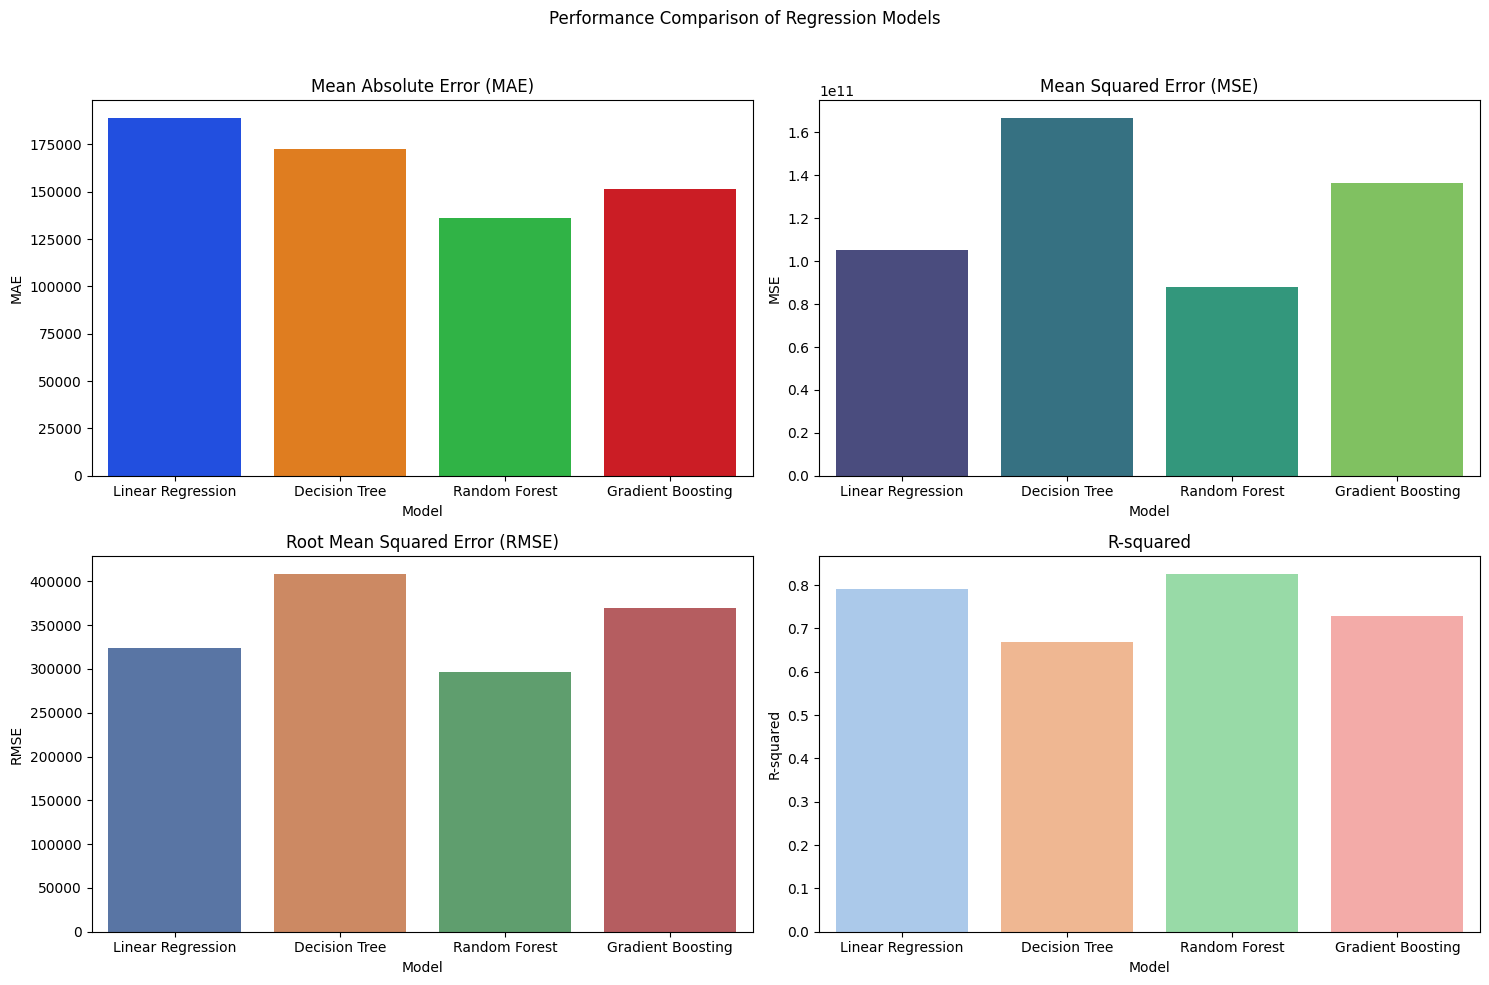

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Comparison of Regression Models')
sns.barplot(x='Model', y='MAE', data=results_df, ax=axes[0, 0],palette='bright')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
sns.barplot(x='Model', y='MSE', data=results_df, ax=axes[0, 1],palette='viridis')
axes[0, 1].set_title('Mean Squared Error (MSE)')
sns.barplot(x='Model', y='RMSE', data=results_df, ax=axes[1, 0],palette='deep')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
sns.barplot(x='Model', y='R-squared', data=results_df, ax=axes[1, 1],palette='pastel')
axes[1, 1].set_title('R-squared')
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()